<a href="https://colab.research.google.com/github/Guuilherme67/Desafios-Lets_Code/blob/main/Gr%C3%A1fico_Pandas_Exerc%C3%ADcio2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Aula 2: Exercícios

Para estes exercícios, iremos utilizar duas bases:

1) base fictícia de funcionários criada por cientistas de dados da IBM.

**Variáveis:**
- **Age:** Idade
- **Attrition:** Se saiu da empresa (Sim ou não)
- **BusinessTravel:** Frequência de viagens a trabalho
- **DailyRate:** Custo do funcionário por dia
- **Department:** Departamento
- **DistanceFromHome:** Distância do trabalho até a casa do funcionário
- **Education:** Nível de educação:
    - 1: 'Below College'
    - 2: 'College'
    - 3: 'Bachelor'
    - 4: 'Master'
    - 5: 'Doctor'
- **EducationField:** Área da educação
- **EmployeeNumber:** ID do funcionário
- **EnvironmentSatisfaction:** Satisfação com o ambiente de trabalho:
    - 1: 'Low'
    - 2: 'Medium'
    - 3: 'High'
    - 4: 'Very High'
- **Gender:** Gênero
- **HourlyRate:** Valor/hora
- **JobInvolvement:** Nível de envolvimento com o trabalho (psicologica e emocionalmente):
    - 1: 'Low'
    - 2: 'Medium'
    - 3: 'High'
    - 4: 'Very High'
- **JobLevel:** Nível do funcionário
- **JobRole:** Cargo
- **JobSatisfaction:** Nível de satisfação com o trabalho:
    - 1: 'Low'
    - 2: 'Medium'
    - 3: 'High'
    - 4: 'Very High'
- **MaritalStatus:** Estado Civil
- **NumCompaniesWorked:** Número de empresas que já trabalhou
- **PercentSalaryHike:** Aumento salarial (%)
- **PerformanceRating:** Nível de performance:
    - 1: 'Low'
    - 2: 'Good'
    - 3: 'Excellent'
    - 4: 'Outstanding'
- **RelationshipSatisfaction:** Satisfação de relacionamento:
    - 1: 'Low'
    - 2: 'Medium'
    - 3: 'High'
    - 4: 'Very High'
- **TotalWorkingYears:** Número de anos trabalhados
- **TrainingTimesLastYear:** Número de treinamentos no ano anterior
- **WorkLifeBalance:** Equilíbrio da vida profissional
    - 1: 'Bad'
    - 2: 'Good'
    - 3: 'Better'
    - 4: 'Best'
- **YearsAtCompany:** Anos na empresa
- **YearsInCurrentRole:** Anos na posição atual
- **YearsSinceLastPromotion:** Anos desde a última promoção
- **YearsWithCurrManager:** Anos com o mesmo gestor

2) Base de dados de casos e óbitos de covid no estado de SP.

- **nome_munic:** Nome do município
- **codigo_ibge:** Código do município no IBGE (7 dígitos)
- **casos_novos:** Casos novos registrados na data
- **obitos_novos:** Óbitos novos registrados na data
- **nome_drs:** Nome do Dpto. Regional de Saúde
- **cod_drs:** Código do Dpto. Regional de Saúde
- **pop:** População Estimada (fonte: SEADE)
- **pop60:** População acima de 60 anos (fonte: SEADE)
- **ano_mes:** Ano e mês dos dados

In [2]:
import pandas as pd
import numpy as np

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
df1 = pd.read_csv('/content/drive/MyDrive/Grafico pandas lets code/Cópia de IBM_Employees.csv')

In [5]:
df2 = pd.read_csv('/content/drive/MyDrive/Grafico pandas lets code/Cópia de dados_covid_sp_20.csv')

## Exercício 1:
Utilizando a base de dados de covid:

**a)** Faça um gráfico de barras mostrando o total de óbitos (considerando todos os meses) para todos os DRS, excluindo a Grande São Paulo. Coloque título no gráfico e nos eixos, defina um tamanho de imagem bom e intercale as barras com as cores 'red' e 'green'.

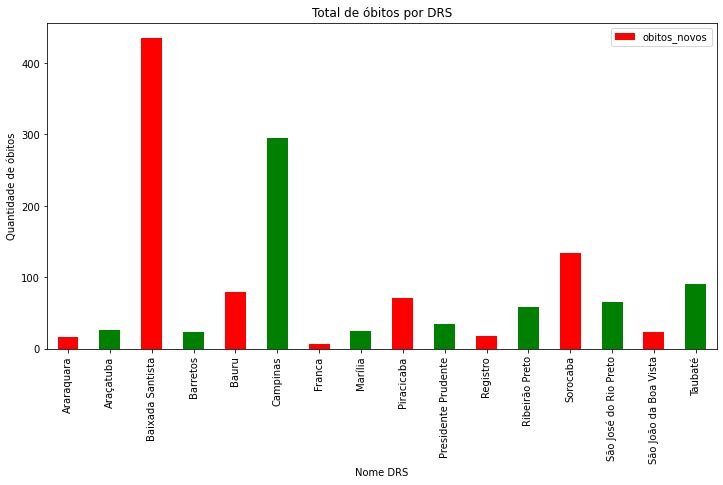

In [8]:
df2[df2['nome_drs']!='Grande São Paulo'].groupby(['nome_drs'], as_index=False).sum().plot.bar(x='nome_drs', y='obitos_novos', 
                                                                                          figsize=(12,6), title='Total de óbitos por DRS', 
                                                                                          color=['red','green'],
                                                                                         xlabel='Nome DRS', ylabel='Quantidade de óbitos')

**b)**  Faça um gráfico de barras horizontal mostrando o total de óbitos no mês de abril para 3 DRS da sua escolha. Coloque título no gráfico e nos eixos, defina um tamanho de imagem bom.

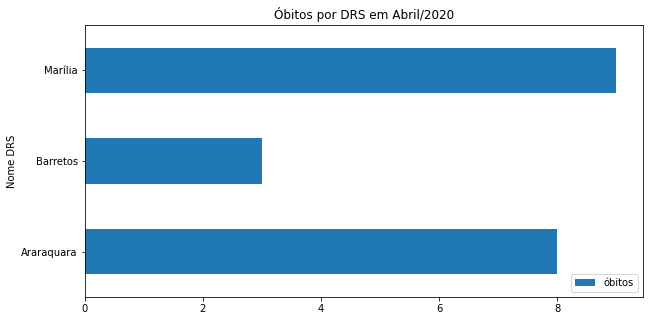

In [11]:
df2[df2['nome_drs'].isin(['Araraquara', 'Marília', 'Barretos'])
   & (df2.ano_mes=='2020-04')].groupby(['nome_drs'], as_index=False).sum().plot.barh(x='nome_drs', y='obitos_novos', 
                                                                                          figsize=(10,5), 
                                                     title='Óbitos por DRS em Abril/2020', label='óbitos',
                                                                                         xlabel='Nome DRS')

## Exercício 2

**a)** Utilizando a base de dados da IBM, crie um histograma para as idades dos funcionários, separando por gênero.

[]

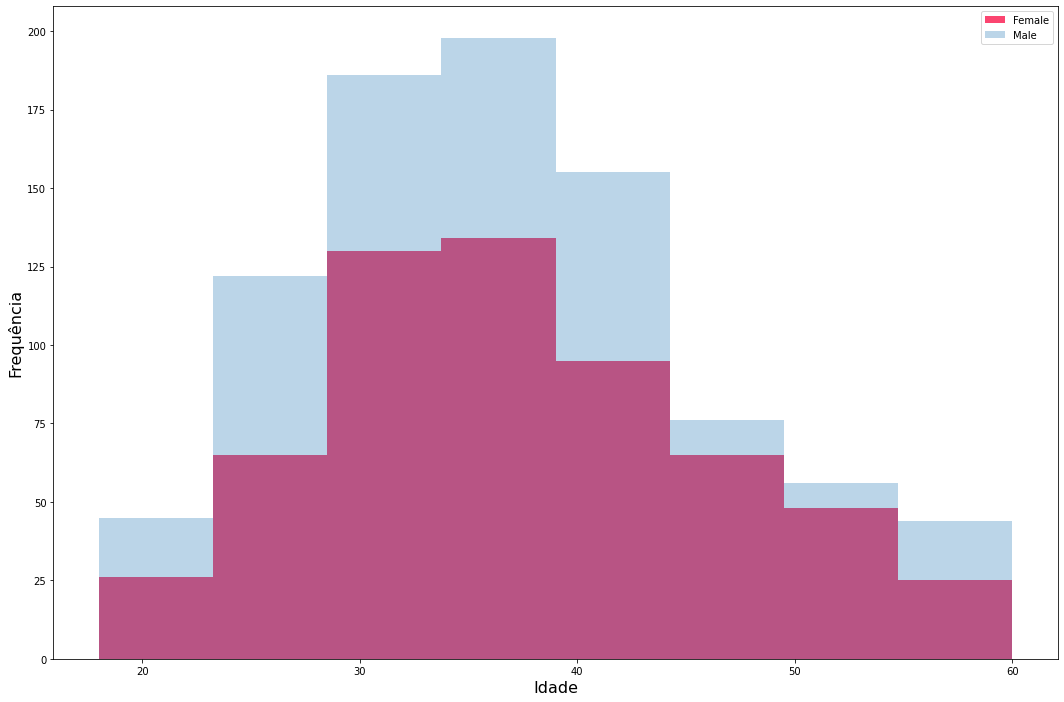

In [39]:
ax_hist = df1[df1['Gender']=='Female'].plot.hist(y='Age', bins=8, figsize=(15,10), label='Female', color='#fb4570')
ax_hist2 = df1[df1['Gender']=='Male'].plot.hist(y='Age', bins=8, figsize=(18,12), alpha=.3, ax=ax_hist, label='Male')
ax_hist.set_xlabel('Idade', fontsize=16)
ax_hist.set_ylabel('Frequência', fontsize=16)

ax_hist.plot()

**b)** Faça agora um boxplot das idades, por gênero.

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


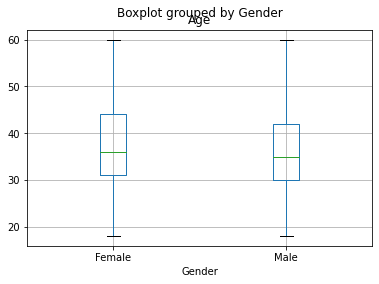

In [40]:
df1.boxplot(column='Age', by='Gender')